In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [203]:
class knn():
    def __init__(self):
        pass
    
    
    def distance(self,  X1, X2 ):
        # return np.array(), shape = (len(X2),)
        return  np.sqrt( np.sum( (X1-X2)**2, axis=1) )
    
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
        
    def prediction(self, X, k=1):
        dists = self.distance(X, self.X_train)
        labels = self.y_train[np.argsort(dists)] # np.argsort() вернет массив индексов по возрастанию (расстояния)
        # y_train[np.argsort(dists)] - переиначенный массив y_train
        c = Counter(labels[:k]) # если Counter(lab[:300]) вернет Counter({7: 297, 9: 3})
        #most_common([n]) - возвращает n наиболее часто встречающихся элементов, где элемент - это кортеж
        #в порядке убывания встречаемости. Если n не указано, возвращаются все элементы.
        return c.most_common(1)[0][0] # а тут мы получим 7
    
    def predict(self, X_test, k=1):
        pred = [0]* len(X_test)
        for i in range(len(X_test)):
            pred[i] = self.prediction(X_test[i], k)
        return pred

In [204]:
def shuffle_data(X, Y, seed=None):
    """ Случайное перемешивание X, Y """
    if seed: # для воспроизведения результатов
        np.random.seed(seed) 
    index = np.arange(X.shape[0]) # массив индексов
    np.random.shuffle(index) # shuffle() перемешивает данные( не надо присваивать переменной, он и так меняет index)
    return X[index], Y[index]

def train_test_split(X, Y, test_size=0.5, shuffle=True, seed=None):
    if shuffle:
        X, Y = shuffle_data(X, Y, seed)
    # Разделить данные в указанном соотношении ( на тестовые и тренировочные)
    split_i = len(Y) - int(len(Y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = Y[:split_i], Y[split_i:]

    return X_train, X_test, y_train, y_test

In [205]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
d = {'Setosa' : 0, 'Versicolor' : 1, 'Virginica': 2 }
df['variety'] = df['variety'].map(d)
X = np.array(df.drop(['variety'], axis=1))
y=np.array(df['variety'])

In [206]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.33, True,  23)
iris_model = knn()
iris_model.train(X_train, y_train)
y_pr=iris_model.predict(X_test, 3)


In [208]:
np.mean(y_pr==y_test)

0.9795918367346939

#### Рассмотрим случай с тремя измерениями

In [209]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
d = {'Setosa' : 0, 'Versicolor' : 1, 'Virginica': 2 }
df['variety'] = df['variety'].map(d)
X = df.drop(['variety'], axis=1)
X =np.array( X.drop(['sepal.width'], axis=1))
y=np.array(df['variety'])

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.33, True,  23)
iris3D = knn()
iris3D.train(X_train, y_train)
y_pr=iris3D.predict(X_test, 3)

In [211]:
np.mean(y_pr==y_test)

0.9795918367346939

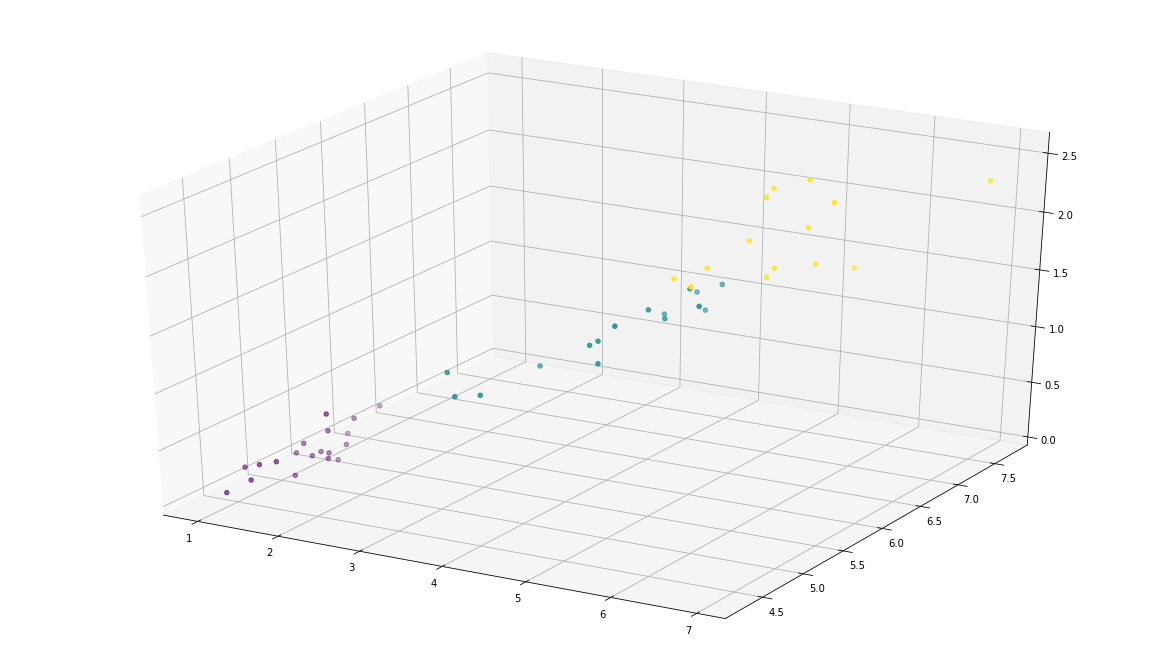

In [218]:
# Начальные данные
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_test[:, 1], X_test[:, 0], X_test[:, 2], c=y_test);

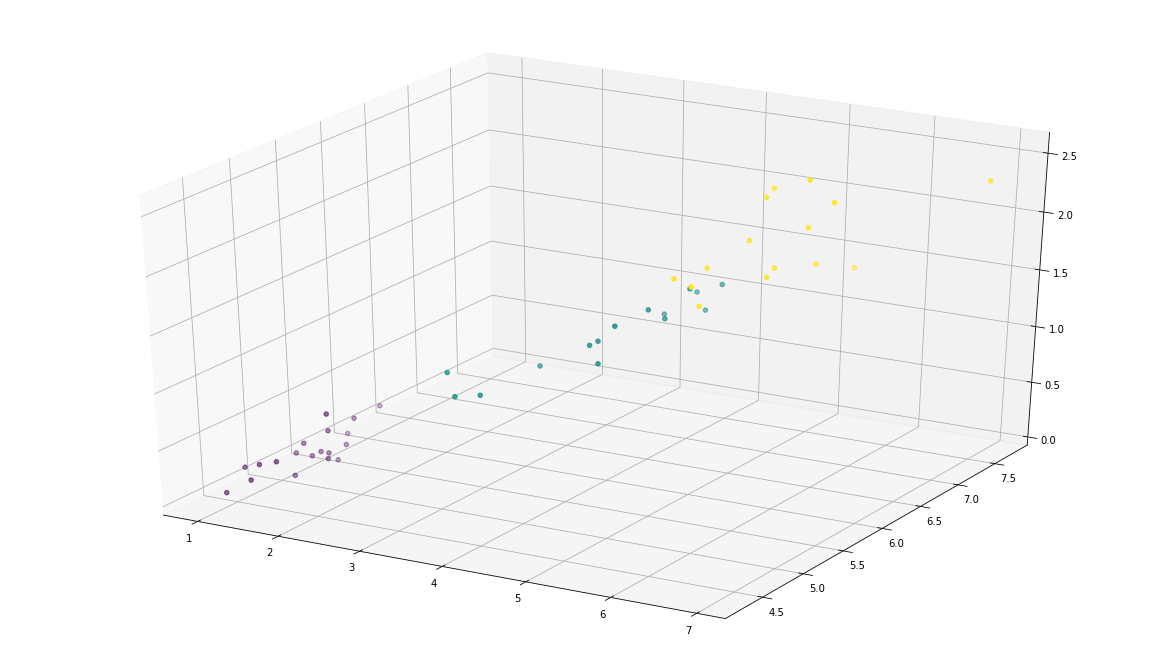

In [219]:
# Предсказанные значения
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_test[:, 1], X_test[:, 0], X_test[:, 2], c=np.array(y_pr));